[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2556455148965760375
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2178779136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 664726295968113547
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
Epoch 1/20
29669/29669 [==============================] - 56s 2ms/step - loss: 0.1039 - acc: 0.8815 - val_loss: 0.1010 - val_acc: 0.8817
Epoch 2/20
29669/29669 [==============================] - 53s 2ms/step - loss: 0.0992 - acc: 0.8816 - val_loss: 0.0919 - val_acc: 0.8817
Epoch 3/20
29669/29669 [==============================] - 55s 2ms/step - loss: 0.0905 - acc: 0.8836 - val_loss: 0.0896 - val_acc: 0.8869
Epoch 4/20
29669/29669 [==============================] - 54s 2ms/step - loss: 0.0895 - acc: 0.8867 - val_loss: 0.0895 - val_acc: 0.8868
Epoch 5/20
29669/29669 [==============================] - 55s 2ms/step - loss

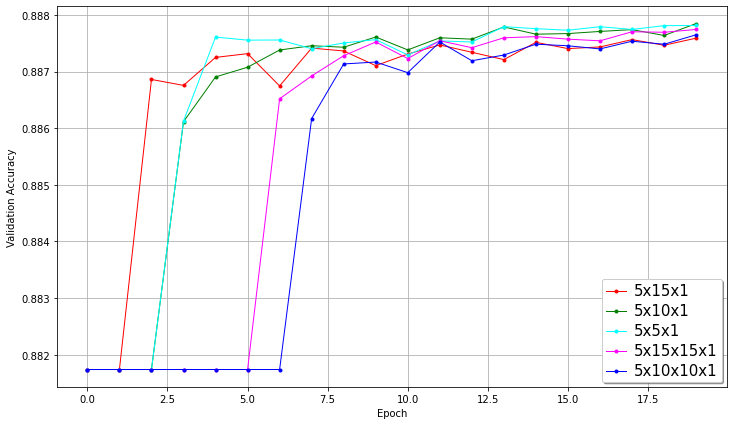

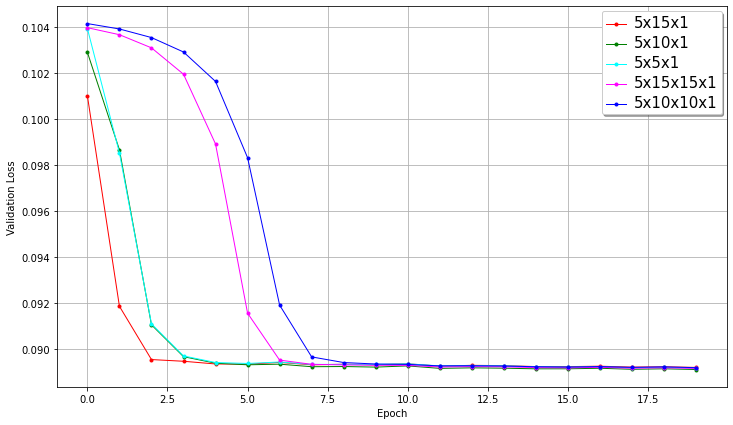

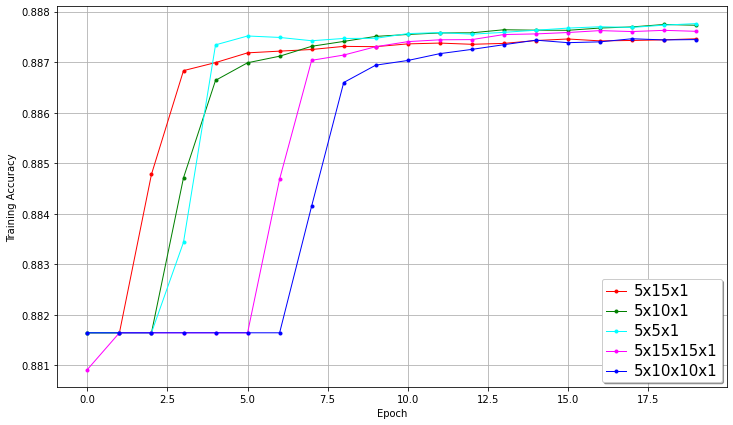

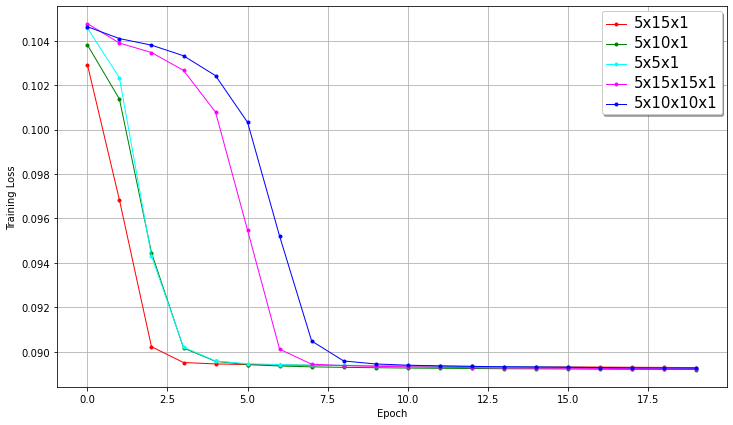

In [1]:

# coding: utf-8

# In[1]:



import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from IPython.display import display

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

from keras import backend as K

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout  
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split   
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os 

seed = 0
tf.random.set_seed(seed)   #원래 코드 : tf.set_random_seed(seed)에서 수정 

# model-compile parameter sets

model_metrics = 'acc'        #accuary
num_epochs = 5000
num_batch = 100
num_split = 0.2

input_file = r'C:\Users\Baek\Desktop\combine\ClassC'
output_file = r'C:\Users\Baek\Desktop\combine\ClassC\stat_classC.csv'

# train set     #데이터셋 다음주에 교수님이 주심 
org_inp_num = 14 
all_files = glob.glob(os.path.join(input_file, 'classD_*'))     
df_from_each_file = (pd.read_csv(f, header=None) for f in all_files)   #column명을 안쓰고 value로 하려면 header=none, pd.read_csv 파일 읽기 
combine_df   = pd.concat(df_from_each_file, axis=0, ignore_index=True)     # pd.concat() 함수는 pandas의 DataFrame 합치는 방법,parameter ignore_index=True 는 기존 index  무시 
combine_df.columns = ["BTS", "BTD", "BSR", "MTD", "CBF", "A","B","C","D","E","F","G","H","I","Class"]  #.columns는 속성별 키워드를 지정한 것 총 6개의 속성
df = combine_df.sample(frac=1).values  #frac=1을 설정해서 모든 데이터를 반환

# model I: 14x15x1
inp_num = 14  
updated_columns = ["BTS", "BTD", "BSR", "MTD", "CBF", "A","B","C","D","E","F","G","H","I","Class"]
x = df[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]  #input의 리스트 inp_num
y = df[:, org_inp_num]  #output에 train set의 inp_num

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=num_split, random_state=seed)  #학습셋과 테스트셋 구분(overfitting 방지), test_size = 0.2  학습셋을 80%, 테스트셋을 20%로 설정 

model = Sequential()
model.add(Dense(15, input_dim=inp_num, activation='sigmoid'))  #input값이 5 따라서 입력층+은닉층의 역할 5개의 값이 들어감 은닉층에 30개의 노드 
model.add(Dense(1, activation='sigmoid'))   #출력층, 1개의 노드 
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[model_metrics])    
history = []
history.append(model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                         epochs=num_epochs, batch_size=num_batch))       #학습
model.save('model_14x15x1.h5')  # 모델을 컴퓨터에 저장
eval_model = []
eval_model.append(model.evaluate(X_test, Y_test)[1])   #테스트 
print("\nTest Accuracy: %.4f" % eval_model[0])
del model       # 테스트를 위해 메모리 내의 모델을 삭제


# model II   14x10x1
inp_num = 14
updated_columns = ["BTS", "BTD", "BSR", "MTD", "CBF", "A","B","C","D","E","F","G","H","I","Class"]
x = df[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = df[:, org_inp_num]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=num_split, random_state=seed)

model = Sequential()
model.add(Dense(10, input_dim=inp_num, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[model_metrics])
history.append(model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                         epochs=num_epochs, batch_size=num_batch))
model.save('model_14x47x1.h5')  # 모델을 컴퓨터에 저장
eval_model.append(model.evaluate(X_test, Y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])
del model       # 테스트를 위해 메모리 내의 모델을 삭제


# model III   14x5x1
inp_num = 14
updated_columns = ["BTS", "BTD", "BSR", "MTD", "CBF", "A","B","C","D","E","F","G","H","I","Class"]
x = df[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = df[:, org_inp_num]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=num_split, random_state=seed)

model = Sequential()
model.add(Dense(5, input_dim=inp_num, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[model_metrics])
history.append(model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                         epochs=num_epochs, batch_size=num_batch))
model.save('model_14x5x1.h5')  # 모델을 컴퓨터에 저장
eval_model.append(model.evaluate(X_test, Y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])
del model       # 테스트를 위해 메모리 내의 모델을 삭제
    

# model IV:    14x15x15x1
updated_columns = ["BTS", "BTD", "BSR", "MTD", "CBF", "A","B","C","D","E","F","G","H","I","Class"]
x = df[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = df[:, org_inp_num]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=num_split, random_state=seed)

model = Sequential()
model.add(Dense(15, input_dim=inp_num, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[model_metrics])
history.append(model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                         epochs=num_epochs, batch_size=num_batch))
model.save('model_14x15x15x1.h5')  # 모델을 컴퓨터에 저장
eval_model.append(model.evaluate(X_test, Y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])
del model       # 테스트를 위해 메모리 내의 모델을 삭제
      


# model V   14x10x10x1
updated_columns = ["BTS", "BTD", "BSR", "MTD", "CBF", "A","B","C","D","E","F","G","H","I","Class"]
x = df[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = df[:, org_inp_num]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=num_split, random_state=seed)

model = Sequential()
model.add(Dense(10, input_dim=inp_num, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[model_metrics])
history.append(model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                         epochs=num_epochs, batch_size=num_batch))
model.save('model_14x10x10x1.h5')  # 모델을 컴퓨터에 저장
eval_model.append(model.evaluate(X_test, Y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])
del model 

print("\n")

# val_acc graph   : epoch에 따른  테스트(test) 정확도 ,  테스트 손실 결과를 표로 도출하는 부분 

y_vacc = []        
x_len = []
y_vloss = []

plt.figure(figsize=(12,7))     #가로 12 세로 7


colorlist = ["red",  "green", "cyan","magenta", "blue"]
marklist = ['.', '+', 'o', '*', 'x']
for idx in range(5):
    y_vacc.append(history[idx].history['val_acc'])  #history에 저장된 인텍스는 총 4개 0,1,2,3,4 (모델을 5개 만들었으니) 따라서 range 범위도 5(index 0,1,2,3,4)
    x_len.append(numpy.arange(len(y_vacc[idx])))   #len()은 리스트에 들어있는 원소 개수,리스트의 크기 / 결국 y_vacc에 들어간 인덱스 값만큼 x_len도 같은 리스트 크기를 만들겠다는것?
    plt.plot(x_len[idx], y_vacc[idx], marker=marklist[0], lw=1.0, c=colorlist[idx], label=str(idx))   #marker 는 선의 종류를 표시 marklist의 인텍스 값이 0 임으로 '.'으로 표시됨

plt.legend(('14x15x1', '14x10x1', '14x5x1', '14x15x15x1', '14x10x10x1'),   #라벨을 달고 라벨명을 달수있는데 그것이 plt.legend  loc = 오른쪽 하단에 표시하겠다는것
           shadow=True, loc='lower right')
ltext = plt.gca().get_legend().get_texts()   
ftsize = 15
plt.setp(ltext[0], fontsize=ftsize) #setp()메서드로 pyplot의 객체 속성을 정할 수 있음, 매개변수로 Itext(폰트종류)와 폰트사이즈를 정한것 같음
plt.setp(ltext[1], fontsize=ftsize)
plt.setp(ltext[2], fontsize=ftsize)
plt.setp(ltext[3], fontsize=ftsize)
plt.setp(ltext[4], fontsize=ftsize)

plt.grid()    #grid()메서드는 격자를 생성해줌 
plt.xlabel('Epoch') #x축의 이름 표시 
plt.ylabel('Validation Accuracy')  #y축의 이름 표시 
plt.show()    #ipython에서는 show() 호출 하지 않아도됨 
print("\n")

# loss graph
plt.figure(figsize=(12,7))
x_len = []

for idx in range(5):
    y_vloss.append(history[idx].history['val_loss'])
    x_len.append(numpy.arange(len(y_vloss[idx])))
    plt.plot(x_len[idx], y_vloss[idx], marker='.', lw=1.0, c=colorlist[idx], label=str(idx))

plt.legend(('14x15x1', '14x10x1', '14x5x1', '14x15x15x1', '14x10x10x1'),
           shadow=True, loc='upper right')   #shadow=True 파라미터를 사용해서 텍스트 상자에 그림자를 표시할 수 있습니다.
ltext = plt.gca().get_legend().get_texts()  #아마 폰트 종류를 지정해준것?
ftsize = 15
plt.setp(ltext[0], fontsize=ftsize)
plt.setp(ltext[1], fontsize=ftsize)
plt.setp(ltext[2], fontsize=ftsize)
plt.setp(ltext[3], fontsize=ftsize)
plt.setp(ltext[4], fontsize=ftsize)

plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
print("\n")


# In[2]:  epoch에 따른 학습 정확도(training) , 학습 손실  결과를 표로 도출하는 부분 


y_acc = []
y_loss = []
x_len = []

plt.figure(figsize=(12,7))


colorlist = ["red",  "green", "cyan","magenta", "blue"]
marklist = ['.', '+', 'o', '*', 'x']
for idx in range(5):
    y_acc.append(history[idx].history['acc'])   
    x_len.append(numpy.arange(len(y_acc[idx])))
    plt.plot(x_len[idx], y_acc[idx], marker=marklist[0], lw=1.0, c=colorlist[idx], label=str(idx))    

plt.legend(('14x15x1', '14x10x1', '14x5x1', '14x15x15x1', '14x10x10x1'),
           shadow=True, loc='lower right')
ltext = plt.gca().get_legend().get_texts()
ftsize = 15
plt.setp(ltext[0], fontsize=ftsize)
plt.setp(ltext[1], fontsize=ftsize)
plt.setp(ltext[2], fontsize=ftsize)
plt.setp(ltext[3], fontsize=ftsize)
plt.setp(ltext[4], fontsize=ftsize)

plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()
print("\n")

# loss graph
plt.figure(figsize=(12,7))
x_len = []

for idx in range(5):
    y_loss.append(history[idx].history['loss'])
    x_len.append(numpy.arange(len(y_loss[idx])))
    plt.plot(x_len[idx], y_loss[idx], marker='.', lw=1.0, c=colorlist[idx], label=str(idx))

plt.legend(('14x15x1', '14x10x1', '14x5x1', '14x15x15x1', '14x10x10x1'),
           shadow=True, loc='upper right')
ltext = plt.gca().get_legend().get_texts()
ftsize = 15
plt.setp(ltext[0], fontsize=ftsize)
plt.setp(ltext[1], fontsize=ftsize)
plt.setp(ltext[2], fontsize=ftsize)
plt.setp(ltext[3], fontsize=ftsize)
plt.setp(ltext[4], fontsize=ftsize)

plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
print("\n")

